In [31]:
import pandas as pd #used to load and manupulate data in one hot encoding
import numpy as np #used for numerical analysis and data manupilation
import matplotlib.pyplot as plt # used for ploting graphs
import matplotlib.colors as colors 
from sklearn.utils import resample #used for downsampling the data
from sklearn.model_selection import train_test_split #used for splitting the data into train and test
from sklearn.preprocessing import scale #Scale and center the data
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.model_selection import GridSearchCV #used for hyperparameter tuning, cross validation
from sklearn.metrics import confusion_matrix #used for calculating the confusion matrix
from sklearn.metrics import plot_confusion_matrix #used for plotting the confusion matrix
from sklearn.decomposition import PCA #used for dimensionality reduction and and making data plottable.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report #used for calculating the accuracy, precision, recall and f1 score


In [32]:
df=pd.read_csv('dataset./city_hour.csv')
df=df.drop(['Xylene','Toluene','Benzene','City','PM10'],axis=1)
df


,Datetime,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,2015-01-01 01:00:00,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,NaN,NaN
1,2015-01-01 02:00:00,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,NaN,NaN
2,2015-01-01 03:00:00,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,NaN,NaN
3,2015-01-01 04:00:00,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,NaN,NaN
4,2015-01-01 05:00:00,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
707870,2020-06-30 20:00:00,9.50,2.75,25.57,15.85,4.57,0.62,NaN,27.75,51.0,Satisfactory
707871,2020-06-30 21:00:00,17.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,51.0,Satisfactory
707872,2020-06-30 22:00:00,36.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,50.0,Good
707873,2020-06-30 23:00:00,15.75,1.02,28.90,16.00,3.80,0.49,0.75,15.82,50.0,Good


In [33]:
print(len(df))
df=df.dropna()
print(len(df))

707875
350842


In [34]:
df['AQI_Bucket'].replace(['Good','Satisfactory','Moderate','Poor','Very Poor','Severe'],[0,1,2,3,4,5],inplace=True)


/var/folders/nf/k091r8hx2737drcpbtd8tc_80000gn/T/ipykernel_88568/579878719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_Bucket'].replace(['Good','Satisfactory','Moderate','Poor','Very Poor','Severe'],[0,1,2,3,4,5],inplace=True)


In [35]:
df.head()

,Datetime,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
48220,2020-03-12 13:00:00,25.0,7.14,1.86,11.28,24.00,0.42,4.31,0.76,51.0,1
48221,2020-03-12 14:00:00,19.0,7.32,1.15,10.85,27.59,0.44,4.65,0.07,52.0,1
48222,2020-03-12 15:00:00,24.0,7.14,1.04,10.51,31.13,0.43,4.83,0.67,52.0,1
48223,2020-03-12 16:00:00,25.0,7.20,1.19,10.74,33.31,0.46,5.26,0.05,53.0,1
48224,2020-03-12 17:00:00,33.0,7.22,1.37,10.93,30.05,0.50,5.39,0.02,54.0,1


In [36]:
df_good=df[df['AQI_Bucket']==0]
print(len(df_good))
df_satisfactory=df[df['AQI_Bucket']==1]
print(len(df_satisfactory))
df_moderate=df[df['AQI_Bucket']==2]
print(len(df_moderate))
df_poor=df[df['AQI_Bucket']==3]
print(len(df_poor))
df_very_poor=df[df['AQI_Bucket']==4]
print(len(df_very_poor))
df_severe=df[df['AQI_Bucket']==5]
print(len(df_severe))


24215
128385
126627
37241
26574
7800


In [37]:
df_good_downsampled=resample(df_good,replace=True,n_samples=500,random_state=42)  
df_satisfactory_downsampled=resample(df_satisfactory,replace=False,n_samples=500,random_state=69)
df_moderate_downsampled=resample(df_moderate,replace=False,n_samples=500,random_state=69)
df_poor_downsampled=resample(df_poor,replace=False,n_samples=500,random_state=69)
df_very_poor_downsampled=resample(df_very_poor,replace=False,n_samples=500,random_state=69)
df_severe_downsampled=resample(df_severe,replace=False,n_samples=500,random_state=69)

In [38]:
df_downsampled=pd.concat([df_good_downsampled,df_satisfactory_downsampled,df_moderate_downsampled,df_poor_downsampled,df_very_poor_downsampled,df_severe_downsampled])
len(df_downsampled)

3000

In [39]:
X=df_downsampled.drop(['AQI','AQI_Bucket','Datetime'],axis=1)
y=df_downsampled['AQI_Bucket']
#z=df_downsampled['AQI']

In [40]:
#X_train,X_test,y_train,y_test,z_train,z_test=train_test_split(X,y,z,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)
param_grid=[{'C':[0.5,1,10,100],'gamma':['scale',1,0.1,0.01,0.001,0.0001],'kernel':['rbf','linear']}]
optimal_params=GridSearchCV(SVC(),param_grid,cv=10,scoring='accuracy',verbose=3)
optimal_params.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 1/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.595 total time=   0.3s
[CV 2/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.586 total time=   0.3s
[CV 3/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.533 total time=   0.3s
[CV 4/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.586 total time=   0.3s
[CV 5/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.600 total time=   0.3s
[CV 6/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.562 total time=   0.3s
[CV 7/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.562 total time=   0.3s
[CV 8/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.562 total time=   0.3s
[CV 9/10] END ...C=0.5, gamma=scale, kernel=rbf;, score=0.533 total time=   0.3s
[CV 10/10] END ..C=0.5, gamma=scale, kernel=rbf;, score=0.557 total time=   0.3s
[CV 1/10] END C=0.5, gamma=scale, kernel=linear;, score=0.600 total time=   0.2s
[CV 2/10] END C=0.5, gamma=scale, kernel=linea

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'linear']}],
             scoring='accuracy', verbose=3)

In [43]:
print(optimal_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [46]:
final_svm=SVC(C=100,kernel='rbf',gamma=0.01,random_state=42)
final_svm.fit(X_train_scaled,y_train)
y_predict=final_svm.predict(X_test_scaled)
print(confusion_matrix(y_test,y_predict))
accuracy = accuracy_score(y_test,y_predict)*100
recall=recall_score(y_test,y_predict,average='weighted')
f1=f1_score(y_test,y_predict,average='weighted')
print(accuracy,f1,recall)

[[138  24   0   0   0   0]
 [ 31  84  34   2   0   0]
 [  7  39  61  35   4   2]
 [  2   4  29  72  31   5]
 [  1   1   6  31  81  21]
 [  0   0   5  10  57  83]]
57.666666666666664 0.5759994852690129 0.5766666666666667


/Users/yashagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


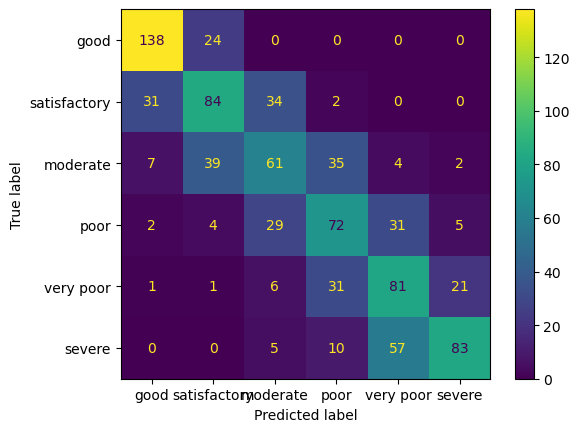

In [47]:
plot_confusion_matrix(final_svm,X_test_scaled,y_test,values_format='d',display_labels=['good','satisfactory','moderate','poor','very poor','severe'])   